In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [6]:
len(some_digit)

784

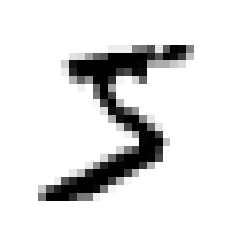

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
import numpy as np
y = y.astype(np.uint8)

**Take Tast-Train:**
Because already this dataset split into train-test as first 60.000 and rest of that. WE can do this:

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

moreover, this data already shuffled. Some of ml algorithm, can be bad perform when data has already ordered. So thats good.

## Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit

In [44]:
y_train==5

array([ True, False, False, ...,  True, False, False])

In [45]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. **This classifier has the advantage of being capable of handling very large datasets efficiently.** This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an SGDClassifier and train it on the whole training set:

In [46]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right in this particular case! Now, let’s evaluate this model’s performance.

### Performans Measure

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

That's look amazing but there is a trick, lets take a look this very dump classifier that predicted "false" for all target:

In [60]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [61]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Ehehehehehehe, thats give us over 90% accuracy!! WHY? Thats because only about 10% of the images are 5's. So if you always predict that thats not 5, it will give you %90 acurracy.This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed/çarpık datasets 

To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets. 

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

NameError: name 'sgd_clf' is not defined

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [51]:
from sklearn.metrics import confusion_matrix


In [63]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Bu matrisin ilk satırı 5 olmayan görüntüyü ( negatif sınıf ) dikkate alır: bunların 53.057'si doğru şekilde 5 olmayan olarak sınıflandırılırken ( gerçek negatifler olarak adlandırılırlar ) geri kalan 1.522'si yanlış bir şekilde 5'ler ( yanlış pozitifler ) olarak sınıflandırılır . İkinci satır, 5'lerin ( pozitif sınıf ) görüntülerini dikkate alır : 1.325 yanlış bir şekilde 5 olmayan ( yanlış negatifler ) olarak sınıflandırılırken, kalan 4.096 doğru şekilde 5'ler olarak sınıflandırılmıştır ( gerçek pozitifler). Mükemmel bir sınıflandırıcı, yalnızca gerçek pozitiflere ve gerçek negatiflere sahip olacaktır, bu nedenle, kafa karışıklığı matrisi, yalnızca ana köşegeninde sıfır olmayan değerlere sahip olacaktır (soldan aşağıya doğru):

In [64]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3530 / (3530 + 687)  5'lerin kaçı yanlış tahmin edildi?
#precision= olumlu tahmiinlerin doğruluğu

NameError: name 'y_train_5' is not defined

In [69]:
recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 1891) Gerçek 5'lerin % kaçı algılandı?
#doğru şekilde algılanan pozitif örneklerin oranıdır 

0.6511713705958311

Artık 5 dedektörünüz doğruluğuna baktığınızda göründüğü kadar parlak görünmüyor. Bir görüntünün 5'i temsil ettiğini iddia ettiğinde, zamanın yalnızca% 83u doğrudur. Dahası, 5'lerin yalnızca% 65'ini algılar

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall

In [70]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
#threshold: 

In [75]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [76]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [77]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

ValueError: x and y must have same first dimension, but have shapes (3908,) and (59966,)

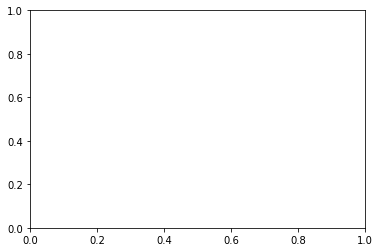

In [167]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    #plt.legend(loc="lower right")
    #[...] # highlight the threshold and add the legend, axis label, and grid
    plt.grid()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Another way to select a good precision/recall trade-off is to plot precision directly against recall, as shown in Figure 3-5 (the same threshold as earlier is highlighted).

Text(0, 0.5, 'precision')

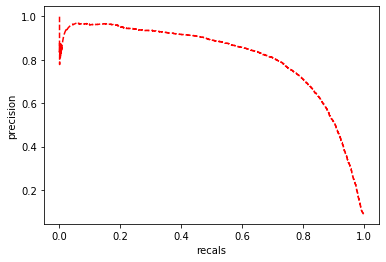

In [93]:
plt.plot(recalls[:-1],precisions[:-1], "r--")
plt.xlabel("recals")
plt.ylabel("precision")

In [94]:
#0.6,0.8 arasındakibir recall noktası uygun olabilir... Go on. 

Suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index of the maximum value, which in this case means the first True value):

In [116]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
# np.argmax(precisions >= 0.90) True olan ilk degeri dondurur.
threshold_90_precision

3370.0194991439557

In [101]:
np.argmax(precisions >= 0.90)

57075

In [118]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

Let’s check these predictions’ precision and recall:

In [119]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [120]:
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706

Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. But wait, not so fast. A high-precision classifier is not very useful if its recall is too low!

**If someone says, “Let’s reach 99% precision,” you should ask, “At what recall?”**

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive.

**FPR:** Negatif olanlar arasında yanlış tahmin edilenlerin oranı

To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

No handles with labels found to put in legend.


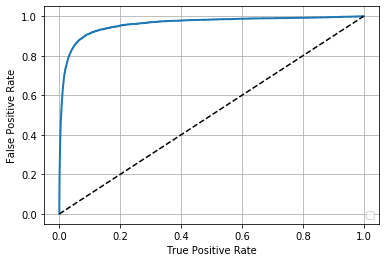

In [165]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.grid()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    

plot_roc_curve(fpr, tpr)
plt.show()

In [147]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**TIP**

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. First, you need to get scores for each instance in the training set. But due to the way it works (see Chapter 7), the RandomForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method. Scikit-Learn classifiers generally have one or the other, or both. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5, cv=3, method="predict_proba")

In [ ]:
y_probas_forest

In [163]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)

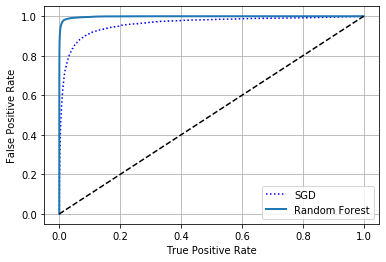

In [164]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Figure 3-7. Comparing ROC curves: the Random Forest classifier is superior to the SGD classifier because its ROC curve is much closer to the top-left corner, and it has a greater AUC

In [169]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification

Some algorithms (such as Logistic Regression classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as SGD Classifiers or Support Vector Machine classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.

Multiclass Classification için OvsR ve OvsO yöntemleri vardır. bu yöntemler hakkında bilgiler kitapta, Multiclass Classification başlığının hemen altında veriliyor.

In [20]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [21]:
some_digit_scores= svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [23]:
np.argmax(some_digit_scores)

5

In [24]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
svm_clf.classes_[5]

5

If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. 

In [26]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
array([5], dtype=uint8)
len(ovr_clf.estimators_)

NameError: name 'array' is not defined

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
array([5], dtype=uint8)

This time Scikit-Learn used the OvR strategy under the hood: since there are 10 classes, it trained 10 binary classifiers. The decision_function() method now returns one value per class. Let’s look at the score that the SGD classifier assigned to each class:

In [ ]:
sgd_clf.decision_function([some_digit])

You can see that the classifier is fairly confident about its prediction: almost all scores are largely negative, while class 5 has a score of 2412.5. The model has a slight doubt regarding class 3, which gets a score of 573.5. Now of course you want to evaluate this classifier. As usual, you can use cross-validation. Use the cross_val_score() function to evaluate the SGDClassifier’s accuracy:

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

It gets over 84% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. Simply scaling the inputs (as discussed in Chapter 2) increases accuracy above 89%:

In [37]:
X_train #X_train befor scaled.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)

NameError: name 'confusion_matrix' is not defined

In [52]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s **matshow()** function:

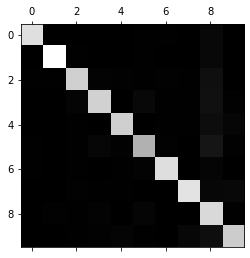

In [53]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks pretty good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad):

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [55]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [74]:
norm_conf_mx = conf_mx / row_sums #conf_matrixteki her satırdaki dizinin 
#değerlerini row_sums dizisinin her satırındaki degerlerine sırayla boler.
#Boylece daha doğru bir matrix, oranların olduğu bir matrix elde ederiz.

In [67]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [68]:
conf_mx[0][0]

5577

In [70]:
conf_mx[1][1]

6400

In [71]:
norm_conf_mx[0][0]

0.9415836569306095

In [72]:
norm_conf_mx[1][1]

0.9492732126965292

In [82]:
norm_conf_mx[:3]

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03]])

Fill the diagonal with zeros to keep only the errors, and plot the result:

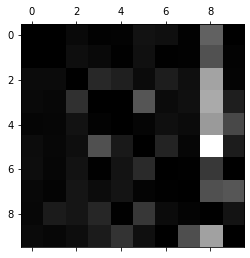

In [99]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


You can clearly see the kinds of errors the classifier makes. Remember that rows represent actual classes, while columns represent predicted classes. The column for class 8 is quite bright, which tells you that many images get misclassified as 8s.However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s.**Yani gerçekten 8 olanlar 8 olarak sınıflandırılmış, sorun; 8 olmayan birçok sayının da 8 oalrak sınıflandırılmış olması.**

Analyzing the confusion matrix often gives you insights into ways to improve your classifier. Looking at this plot, it seems that your efforts should be spent on reducing the false 8s. For example, you could try to gather more training data for digits that look like 8s (but are not) so that the classifier can learn to distinguish them from real 8s. 

Or you could engineer new features that would help the classifier—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns, such as closed loops, stand out more.

In [101]:
#bu kısımın yapması gereken, 5 leri ve 3 leri 25 lii kare matrisler halinde yamzsıydı, 
#yapamadık .d

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [103]:
y_train_large

array([False, False, False, ..., False, False,  True])

In [104]:
y_train_odd

array([ True, False, False, ...,  True, False, False])

In [105]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [106]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel, n_jobs=-1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
knn_clf.predict([some_digit])

array([[False,  True]])

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F1 score across all labels:

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

This assumes that all labels are equally important, however, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice One simple option is to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.4

## Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [31]:
noise = np.random.randint(0, 100, (len(X_train), 784))#her biri 784 elemanlı len(X_train) 
#uzunluğunda dizi döndürür
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Let’s take a peek at an image from the test set (yes, we’re snooping on the test data, so you should be frowning right now):

(-0.5, 27.5, 27.5, -0.5)

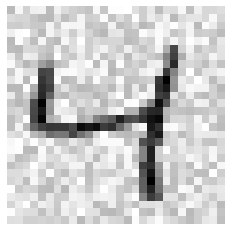

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X_train_mod[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

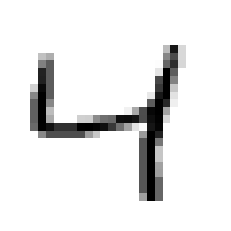

In [59]:
some_digit = X_train[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

On the left is the noisy input image, and on the right is the clean target image. Now let’s train the classifier and make it clean this image:

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
clean_digit = knn_clf.predict([X_test_mod[2]])
#plot_digit(clean_digit)#şu functa bir sorun var, vermesini istediğimiz şey, 
#temizlenmiş 4 görseliydi. Kitabın classification kısmının sonunda bu var.

(-0.5, 27.5, 27.5, -0.5)

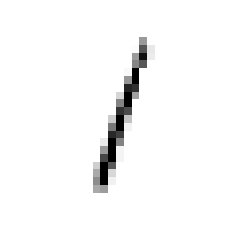

In [66]:
some_digit = clean_digit
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")


#### olmadı sanki kdfjdjfghjdfhgbdhfg

# Exercises Kaldı